# Aproksymacja metodą najmniejszych kwadratów

Aproksymacja metodą najmniejszych kwadratów to technika matematyczna używana do znalezienia najlepszego dopasowania funkcji do zestawu danych pomiarowych. Metoda ta polega na minimalizacji sumy kwadratów różnic między wartościami pomiarowymi a wartościami teoretycznymi funkcji aproksymującej. Innymi słowy, stara się znaleźć funkcję, która w największym stopniu "przybliża" dane wejściowe, minimalizując błędy kwadratowe. Jest często stosowana w analizie statystycznej, statystyce matematycznej, a także w różnych dziedzinach nauki i inżynierii do analizy i prognozowania danych.


## Import Bibliotek

In [54]:
import numpy as np
import sympy as sp

## Przyjęcie od użytkownika stopnia wielomianu aproksymacji

In [55]:
m = int(input("Podaj stopień wielomianu aproksymacji: "))

## Wczytanie danych
Dane wczytywane są z pliku tekstowego o podanej nazwie.
Dane powinny być w formie dwóch kolumn, gdzie pierwsza kolumna to wartości x, a druga kolumna to wartości y.
Kolumny powinny być oddzielone tabulatorem.
Poniższa funkcja automatycznie zastępuje przecinki jako separator dziesiętny na kropki, co pozwala na poprawne wczytanie danych za pomocą np.loadtxt.

In [56]:
nazwa_pliku = 'Aproksymacja_dane.txt'

# Funkcja, która zastępuje przecinki jako separator dziesiętny na kropki - w celu poprawnego wczytania danych za
# pomocą np.loadtxt
def replace_commas_with_periods(filename):
    with open(filename, 'r') as file:
        contents = file.read()
        new_contents = contents.replace(',', '.')
    with open(filename, 'w') as file:
        file.write(new_contents)

replace_commas_with_periods(nazwa_pliku)
coords = np.loadtxt('./' + nazwa_pliku, delimiter=' ')
print(coords)

[[ 0.    1.  ]
 [ 2.    0.86]
 [ 4.    0.16]
 [ 6.   -0.62]
 [ 8.   -1.  ]
 [10.   -0.5 ]]


## Tworzenie macierzy Sk
Macierz s jest tworzona w celu obliczenia zgodnie ze wzorem:

![Wzor Sk](assets/1.png)

W tym celu najpierw inicjalizujemy dwa wektory -
1)**xi** - który przechowuje współrzędne x poszczególnych parametrów,
2)**yi** - który przechowuje współrzędne y poszczególnych parametrów

Następnie iterujemy po każdej wartości xi i tworzymy tymczasową tablicę, która będzie przechowywać aktualny wiersz, który obliczamy i do którego wstawiamy kolejne elementy.
Po tym iterujemy po kolejnych wartościach k (będących w zakresie od 0 do m*2+1) i dodajemy kolejne elementy do tymczasowej macierzy,
które są obliczane są jako potęgi k-tej wartości aktualnie iterowanej wartości xi.
Po zakończeniu iteracji po k dodajemy wiersz do macierzy s korzystając z funkcji np.vstack.


In [57]:
# inicjalizujemy wektory xi i yi
xi = coords[:, 0]
yi = coords[:, 1]
# określamy rozmiar macierzy s poprzez wstawienie do niej pierwszego wiersza (który zawiera tylko zera)
s = np.zeros((1, m*2+1))

# iterujemy po każdej wartości xi
for x in xi:
    # tworzymy tymczasową tablicę, która będzie przechowywać kolejne elementy aktualnego wiersza
    temp = np.array([])
    # iterujemy po kolejnych wartościach k (będących w zakresie od 0 do m*2+1)
    for k in range(0, m*2+1):
        # dodajemy kolejne elementy do wiersza, obliczane jako potęgi k-tej wartości aktualnie iterowanej wartości xi
        temp = np.append(temp, round(x**k,2))
    # dodajemy wiersz do macierzy s
    s = np.vstack((s, temp))

# usuwamy pierwszy wiersz, który zawierał tylko zera
s = np.delete(s, 0, 0)

# sk przechowuje sumy kolejnych kolumn macierzy s
sk = np.sum(s, axis=0)
s = np.vstack((s, sk))

# wyświetlamy macierz s
# np.set_printoptions(suppress=True) - wyłącza notację naukową
np.set_printoptions(suppress=True)
print(s)

[[  1.   0.   0.]
 [  1.   2.   4.]
 [  1.   4.  16.]
 [  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  6.  30. 220.]]


## Tworzenie macierzy S

In [58]:
# tworzymy wstępną macierz wyników i nadajemy jej kształt, wypełniając zerami
wyn = np.zeros((1, m+1))

# iterujemy po wartościach w zakresie od 0 do stopnia wielomianu + 1
for i in range(m+1):
    # tworzymy tymczasową listę, która będzie zawierała kolejne elementy wiersza
    temp = np.array([])
    # dla każdego elementu w zakresie od 0 do stopnia wielomianu + 1
    for j in range(m+1):
        # dodajemy kolejne elementy do tymczasowej listy, która reprezentuje wiersz na zasadzie
        # wartośc listy sk o indeksie równym i+j - czyli dla pierwszego wiersza będą to elementy 0, 1, 2,
        # dla drugiego wiersza elementy 1,2,3
        # dla trzeciego 2,3,4 itd.
        temp = np.append(temp, sk[i+j])
    # dodajemy wiersz do macierzy wyników
    wyn = np.vstack((wyn, temp))

# usuwamy pierwszy wiersz, który zawierał tylko zera
S = np.delete(wyn, 0, 0)
print(S)

[[  6.  30.]
 [ 30. 220.]]


## Tworzenie macierzy Tk
Macierz Tk jest tworzona w celu obliczenia zgodnie ze wzorem:

![Wzor Sk](assets/2.png)

W pierwszym etapie inicjalizujemy macierz, tworząc jeden wiersz zawierający same zera o ilości kolumn równej stopniowi wielomianu.

Następnie iterujemy po każdej wartości xi i tworzymy tymczasową tablicę, która będzie przechowywać aktualny wiersz, który obliczamy i do którego wstawiamy kolejne elementy.
Po tym iterujemy po kolejnych wartościach k (będących w zakresie od 0 do m (stopnia wielomianu)) i dodajemy kolejne
elementy do tymczasowej tablicy, które obliczane są jako potęgi k-tej wartości aktualnie iterowanej wartości xi
pomnożone przez aktualną iterację wartości yi.
Po zakończeniu iteracji po k dodajemy wiersz do macierzy tk korzystając z funkcji np.vstack.
Następnie obliczamy sumę kolejnych wierszy macierzy tk i zapisujemy ją do zmiennej Tk.

In [59]:
# Inicjalizacja macierzy poprzez wstawienie pierwszego wiersza (który zawiera tylko zera)
tk = np.zeros((1, m+1))

# iterujemy po każdej wartości xi
for index, x in enumerate(xi):
    # tworzymy tymczasową tablicę, która będzie przechowywać aktualny wiersz, który obliczamy i do którego wstawiamy kolejne elementy
    temp = np.array([])
    # iterujemy po kolejnych wartościach k (będących w zakresie od 0 do m (stopnia wielomianu))
    # m+1, ponieważ w zakresie od 0 do m (stopnia wielomianu) jest m+1 wartości
    for k in range(0, m+1):
        # dodajemy kolejne elementy do wiersza, obliczane jako potęgi k-tej wartości aktualnie iterowanej wartości xi
        # pomnożone przez aktualną iterację wartości yi
        temp = np.append(temp, x**k * yi[index])
    # dodajemy wiersz do macierzy tk
    tk = np.vstack((tk, temp))

# usuwamy pierwszy wiersz, który zawierał tylko zera
tk = np.delete(tk, 0, 0)
# Sumujemy po kolei wszystkie wiersze macierzy tk
Tk = np.sum(tk, axis=0)
print(Tk)

[ -0.1  -14.36]


## Obliczanie macierzy S^-1

By obliczyć macierz odwrotną do podanej, możemy skorzystać z wbudowanej funkcji np.linalg.inv, która zwraca macierz odwrotną do podanej.

In [60]:
S_inverse = np.linalg.inv(S)
print(S_inverse)

[[ 0.52380952 -0.07142857]
 [-0.07142857  0.01428571]]


## Obliczanie macierzy A

Macierz A jest obliczana zgodnie ze wzorem:

![Wzor Sk](assets/3.png)

W celu mnożenia macierzy korzystamy z wbudowanej funkcji np.dot

In [61]:
A = np.dot(S_inverse, Tk)
print(A)

[ 0.97333333 -0.198     ]


## Obliczanie wzoru funkcji aproksymującej

W tym celu korzystamy z biblioteki symPy, która umożliwa podstawianie wartości symbolicznych do obliczeń.
W tym celu tworzymy zmienną x, która będzie reprezentować zmienną nieznaną w funkcji.
Następnie inicjujemy pustą tablicę, która będzie zawierała kolejne elementy funkcji.
Po tym iterujemy po kolejnych elementach macierzy A i dodajemy kolejne elementy do tablicy, które będą reprezentować kolejne potęgi x.
Po zakończeniu iteracji po wszystkich elementach macierzy A, sumujemy wszystkie elementy tablicy i zapisujemy wynik do zmiennej result.
Wynik jest w postaci wzoru funkcji aproksymującej.

In [62]:
x = sp.Symbol('x')

result_array = np.array([])
for index, a in enumerate(A):
    result_array = np.append(result_array, round(a, 2) * x**index)

result = np.sum(result_array)
print("Wzór funkcji aproksymującej: ")
print(result)

Wzór funkcji aproksymującej: 
0.97 - 0.2*x


## Wyświetlanie wyniku na wykresie

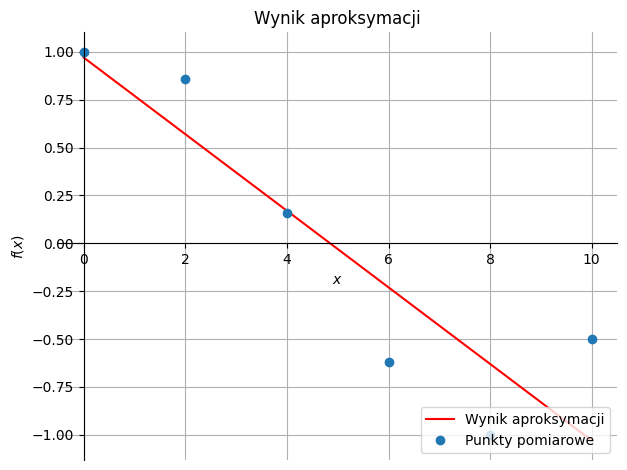

In [63]:
from sympy.plotting.plot import MatplotlibBackend, Plot

# funkcja zwracająca wykres z biblioteki sympy
# Używana z powodu konieczności połączenia wielu wykresów w jeden
def get_sympy_subplots(plot:Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]

p1 = sp.plot(result, (x, 0, 10),  show=False, line_color='red')
p1.title = 'Wynik aproksymacji'
fig, axe = get_sympy_subplots(p1)
# Dodatkowe wykresy-tu punkty interpolacji
axe.plot(xi, yi, "o")
axe.legend(['Wynik aproksymacji', 'Punkty pomiarowe'], loc='lower right')
axe.grid()